In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [2]:
#OK, let us start with the graphml file for London's underground
G = nx.read_graphml('london.graph.xml')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [5]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [6]:
station_name=list(G.nodes)

In [7]:
#since coords tuples are stored as string
#need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [9]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [10]:
# give the 'station name' to the node
station_name = list(G.nodes)
for node in station_name:
    G.nodes[node]['station_name'] = node

In [11]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [12]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,length,flows,station_1_,station_2_
0,Wembley Park,Kingsbury,Jubilee,2916.771558,12356,Wembley Park,Kingsbury
1,Wembley Park,Neasden,Jubilee,2353.165938,6744,Wembley Park,Neasden
2,Wembley Park,Preston Road,Metropolitan,1419.735166,36601,Wembley Park,Preston Road
3,Wembley Park,Finchley Road,Metropolitan,7266.373927,55216,Wembley Park,Finchley Road
4,Kingsbury,Queensbury,Jubilee,1245.995234,9419,Kingsbury,Queensbury
5,Queensbury,Canons Park,Jubilee,1693.307343,6385,Queensbury,Canons Park
6,Canons Park,Stanmore,Jubilee,1419.669476,3624,Canons Park,Stanmore
7,Stratford,West Ham,Jubilee,1673.509515,91801,Stratford,West Ham
8,Stratford,Mile End,Central,2805.001392,12010,Stratford,Mile End
9,Stratford,Leyton,Central,2131.342926,56082,Stratford,Leyton


##  I. Topological network

### I.1. Centrality measures:

#### 1)Degree Centrality on nodes:

In [13]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [14]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


#### 2)Betweenness Centrality on nodes:

In [15]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


#### 3)Closeness Centrality on nodes

In [16]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


### I.3. Impact measures:

#### A) non-sequential removal:

##### 1)Degree centrality

###### 1a）Largest connected component

In [17]:
G1a=G.copy()
# Number of existing nodes:
l1a=list(G1a.nodes)
len(l1a)

401

In [18]:
degree_df=pd.DataFrame.from_dict(dict(deg_london ),columns=['deg_london '],orient='index')
node1=list(degree_df.sort_values('deg_london ',axis = 0,ascending = False).index)
max_1=node1[0:10]

max_1

['Stratford',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Baker Street',
 "Earl's Court",
 'Oxford Circus',
 'Liverpool Street',
 'Waterloo',
 'Green Park',
 'Canning Town']

In [19]:
#If we want to remove the node with the max value of degree centrality:
result_no_of_nodes1=[]
result_size1=[]
result_percent1=[]

for i in range(0,11):
    
# number of connected components
    no_of_nodes=nx.number_connected_components(G1a)
    result_no_of_nodes1.append(no_of_nodes)
    
# let's subset this graph to the largest connected component
    Gcc1a = sorted(nx.connected_components(G1a), key=len, reverse=True)
    Gsub1a = G1a.subgraph(Gcc1a[0])
    size = Gsub1a.number_of_nodes()
    result_size1.append(size)
    
# calculate the percentage of nodes present in the largest connected components
    percent_lcc1a = (len(Gsub1a.nodes)/len(G1a.nodes)) * 100
    result_percent1.append(percent_lcc1a)
#remove the node    
    G1a.remove_nodes_from([node1[i]])
    
print(result_no_of_nodes1)
print(result_size1)
print(result_percent1)

[1, 3, 3, 3, 4, 4, 5, 6, 6, 6, 8]
[401, 379, 378, 377, 374, 373, 371, 365, 364, 363, 349]
[100.0, 94.75, 94.73684210526315, 94.72361809045226, 94.20654911838791, 94.1919191919192, 93.92405063291139, 92.63959390862944, 92.6208651399491, 92.60204081632652, 89.25831202046037]


###### 1b）Global efficiency

In [20]:
G1b=G.copy()
# Number of existing nodes:
l1b=list(G1b.nodes)
len(l1b)

401

In [21]:
#If we want to remove the node with the max value of betweenness centrality:
def global_efficiency(G1b):
        n = len(G1b)
        denom = n * (n - 1)
        if denom != 0:
            lengths = nx.all_pairs_shortest_path_length(G1b)
            g_eff1 = 0
            for source, targets in lengths:
                for target, distance in targets.items():
                    if distance > 0:
                        g_eff1 += 1 / distance
            g_eff1 /= denom
        # g_eff = sum(1 / d for s, tgts in lengths
        #                   for t, d in tgts.items() if d > 0) / denom
        else:
            g_eff1 = 0
    # TODO This can be made more efficient by computing all pairs shortest
    # path lengths in parallel.
        return g_eff1

result_global_eff1=[]    
for i in range(11):
    result_global_eff1.append(global_efficiency(G1b))
    G1b.remove_nodes_from([node1[i]])

print(result_global_eff1)

[0.1012561935972123, 0.08891736066510689, 0.08586164448742485, 0.08028700838265396, 0.07570039409751211, 0.0740361229198828, 0.07274535237569829, 0.07094844226118287, 0.06898194318071488, 0.06825731584971681, 0.06338447666647608]


##### 2)Betweenness centrality

###### 2a）Largest connected component

In [22]:
G2a=G.copy()

In [23]:
between_df=pd.DataFrame.from_dict(dict(bet_london_t),columns=['bet_london_t'],orient='index')
node2=list(between_df.sort_values('bet_london_t',axis = 0,ascending = False).index)
max_2=node2[0:10]

max_2

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [24]:
# Number of existing nodes:
l2a=list(G2a.nodes)
len(l2a)

401

In [25]:
#If we want to remove the node with the max value of between centrality:
result_no_of_nodes2=[]
result_size2=[]
result_percent2=[]

for i in range(0,11):
    
# number of connected components
    no_of_nodes=nx.number_connected_components(G2a)
    result_no_of_nodes2.append(no_of_nodes)
    
# let's subset this graph to the largest connected component
    Gcc2a = sorted(nx.connected_components(G2a), key=len, reverse=True)
    Gsub2a = G2a.subgraph(Gcc2a[0])
    size = Gsub2a.number_of_nodes()
    result_size2.append(size)
    
# calculate the percentage of nodes present in the largest connected components
    percent_lcc2a = (len(Gsub2a.nodes)/len(G2a.nodes)) * 100
    result_percent2.append(percent_lcc2a)
    
    G2a.remove_nodes_from([node2[i]])
    
print(result_no_of_nodes2)
print(result_size2)
print(result_percent2)

[1, 3, 3, 3, 4, 4, 4, 5, 5, 6, 7]
[401, 379, 378, 377, 371, 370, 369, 346, 345, 342, 339]
[100.0, 94.75, 94.73684210526315, 94.72361809045226, 93.45088161209067, 93.43434343434343, 93.41772151898734, 87.81725888324873, 87.78625954198473, 87.24489795918367, 86.70076726342711]


###### 2b）Global efficiency

In [26]:
G2b=G.copy()

In [27]:
# Number of existing nodes:
l2b=list(G2b.nodes)
len(l2b)

401

In [28]:
result_global_eff2=[]    
for i in range(11):
    result_global_eff2.append(global_efficiency(G2b))
    G2b.remove_nodes_from([node2[i]])

print(result_global_eff2)

[0.1012561935972123, 0.08891736066510689, 0.08586164448742485, 0.08496349266423939, 0.07849775440713821, 0.07594226578366223, 0.07415154167648695, 0.06820564659789057, 0.06765950327361094, 0.064700058053009, 0.06313903700825897]


##### 3)Closeness centrality

###### 3a）Largest connected component

In [29]:
G3a=G.copy()
# Number of existing nodes:
l3a=list(G3a.nodes)
len(l3a)

401

In [30]:
closeness_df=pd.DataFrame.from_dict(dict(clos_t),columns=['clos_t'],orient='index')
node3=list(closeness_df.sort_values('clos_t',axis = 0,ascending = False).index)
max_3=node3[0:10]

max_3

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [31]:
#If we want to remove the node with the max value of closeness centrality:
result_no_of_nodes3=[]
result_size3=[]
result_percent3=[]

for i in range(0,11):
    
# number of connected components
    no_of_nodes=nx.number_connected_components(G3a)
    result_no_of_nodes3.append(no_of_nodes)
    
# let's subset this graph to the largest connected component
    Gcc3a = sorted(nx.connected_components(G3a), key=len, reverse=True)
    Gsub3a = G3a.subgraph(Gcc3a[0])
    size = Gsub3a.number_of_nodes()
    result_size3.append(size)
    
# calculate the percentage of nodes present in the largest connected components
    percent_lcc3a = (len(Gsub3a.nodes)/len(G3a.nodes)) * 100
    result_percent3.append(percent_lcc3a)
    
    G3a.remove_nodes_from([node3[i]])
        
print(result_no_of_nodes3)
print(result_size3)
print(result_percent3)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]
[401, 400, 399, 398, 397, 396, 395, 394, 393, 392, 389]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.48849104859335]


###### 3b）Global efficiency

In [32]:
G3b=G.copy()

In [33]:
# Number of existing nodes:
l3b=list(G3b.nodes)
len(l3b)

401

In [34]:
result_global_eff3=[]    
for i in range(11):
    result_global_eff3.append(global_efficiency(G3b))
    G3b.remove_nodes_from([node3[i]])

print(result_global_eff3)

[0.1012561935972123, 0.09918991960788402, 0.09487232544791133, 0.08793385149140875, 0.08737164566976727, 0.08485943799789313, 0.08278135073141742, 0.08258086417012774, 0.08260040537396239, 0.08262233108950982, 0.08166991436767818]


#### B) Sequential removal:

##### 1)Degree centrality

###### 1a）Largest connected component

In [35]:
G4a=G.copy()
# Number of existing nodes:
l4a=list(G4a.nodes)
len(l4a)

401

In [36]:
#If we want to remove the node with the max value of closeness centrality:
remove4=[]
result_no_of_nodes4=[]
result_size4=[]
result_percent4=[]

for i in range(0,11):
    deg_london=nx.degree_centrality(G4a)
    nx.set_node_attributes(G4a,dict(deg_london),'degree')
    degree_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
    node4=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
    remove4.append(node4[0])
    
# number of connected components
    no_of_nodes=nx.number_connected_components(G4a)
    result_no_of_nodes4.append(no_of_nodes)
    
# let's subset this graph to the largest connected component
    Gcc4a = sorted(nx.connected_components(G4a), key=len, reverse=True)
    Gsub4a = G4a.subgraph(Gcc4a[0])
    size = Gsub4a.number_of_nodes()
    result_size4.append(size)
    
# calculate the percentage of nodes present in the largest connected components
    percent_lcc4a = (len(Gsub4a.nodes)/len(G4a.nodes)) * 100
    result_percent4.append(percent_lcc4a)
    
    G4a.remove_nodes_from([node4[0]])
        
print(remove4)    
print(result_no_of_nodes4)
print(result_size4)
print(result_percent4) 

['Stratford', 'Bank and Monument', 'Baker Street', "King's Cross St. Pancras", "Earl's Court", 'Green Park', 'Canning Town', 'Willesden Junction', 'Turnham Green', 'Oxford Circus', 'Waterloo']
[1, 3, 3, 3, 4, 4, 4, 6, 7, 8, 9]
[401, 379, 378, 377, 374, 373, 372, 358, 344, 338, 336]
[100.0, 94.75, 94.73684210526315, 94.72361809045226, 94.20654911838791, 94.1919191919192, 94.17721518987342, 90.86294416243655, 87.53180661577609, 86.22448979591837, 85.93350383631714]


###### 1b）Global efficiency

In [37]:
G4b=G.copy()
# Number of existing nodes:
l4b=list(G4b.nodes)
len(l4b)

401

In [38]:
result_global_eff4=[]
remove4b=[]
for i in range(11):
    deg_london=nx.degree_centrality(G4b)
    nx.set_node_attributes(G4b,dict(deg_london),'degree')
    degree_df=pd.DataFrame.from_dict(dict(deg_london),columns=['degree'],orient='index')
    node4=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
    remove4b.append(node4[0])

    result_global_eff4.append(global_efficiency(G4b))
    G4b.remove_nodes_from([node4[0]])

print(result_global_eff4)
print(remove4b)

[0.1012561935972123, 0.08891736066510689, 0.08586164448742485, 0.08203328759057034, 0.07570039409751211, 0.0740361229198828, 0.07300367580539921, 0.0677717604548151, 0.06012752519564628, 0.05814535563710196, 0.05685866730429425]
['Stratford', 'Bank and Monument', 'Baker Street', "King's Cross St. Pancras", "Earl's Court", 'Green Park', 'Canning Town', 'Willesden Junction', 'Turnham Green', 'Oxford Circus', 'Waterloo']


##### 2)Betweenness centrality

###### 2a）Largest connected component

In [39]:
G5a=G.copy()
# Number of existing nodes:
l5a=list(G5a.nodes)
len(l5a)

401

In [40]:
#If we want to remove the node with the max value of betweenness centrality:
remove5=[]
result_no_of_nodes5=[]
result_size5=[]
result_percent5=[]


for i in range(0,11):
    bet_london_t=nx.betweenness_centrality(G5a)
    nx.set_node_attributes(G5a,dict(bet_london_t),'betweenness_t')
    between_df=pd.DataFrame.from_dict(dict(bet_london_t),columns=['betweenness_t'],orient='index')
    node5=list(between_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
    remove5.append(node5[0])
    
# number of connected components
    no_of_nodes=nx.number_connected_components(G5a)
    result_no_of_nodes5.append(no_of_nodes)
    
# let's subset this graph to the largest connected component
    Gcc5a = sorted(nx.connected_components(G5a), key=len, reverse=True)
    Gsub5a = G5a.subgraph(Gcc5a[0])
    size = Gsub5a.number_of_nodes()
    result_size5.append(size)
    
# calculate the percentage of nodes present in the largest connected components
    percent_lcc5a = (len(Gsub5a.nodes)/len(G5a.nodes)) * 100
    result_percent5.append(percent_lcc5a)
    
    G5a.remove_nodes_from([node5[0]])
    
print(remove5)    
print(result_no_of_nodes5)
print(result_size5)
print(result_percent5)

['Stratford', "King's Cross St. Pancras", 'Waterloo', 'Bank and Monument', 'Canada Water', 'West Hampstead', "Earl's Court", "Shepherd's Bush", 'Euston', 'Baker Street', 'Acton Town']
[1, 3, 3, 3, 3, 3, 4, 4, 5, 6, 7]
[401, 379, 378, 377, 376, 375, 227, 226, 196, 173, 170]
[100.0, 94.75, 94.73684210526315, 94.72361809045226, 94.7103274559194, 94.6969696969697, 57.46835443037974, 57.360406091370564, 49.87277353689568, 44.13265306122449, 43.47826086956522]


###### 2b）Global efficiency

In [41]:
G5b=G.copy()
# Number of existing nodes:
l5b=list(G5b.nodes)
len(l5b)

401

In [42]:
result_global_eff5=[] 
remove5b=[]
for i in range(11):
    bet_london_t=nx.betweenness_centrality(G5b)
    nx.set_node_attributes(G5b,dict(bet_london_t),'betweenness_t')
    between_df=pd.DataFrame.from_dict(dict(bet_london_t),columns=['betweenness_t'],orient='index')
    node5=list(between_df.sort_values('betweenness_t',axis = 0,ascending = False).index)
    remove5b.append([node5[0]])
    
    result_global_eff5.append(global_efficiency(G5b))
    G5b.remove_nodes_from([node5[0]])

print(result_global_eff5)
print(remove5b)

[0.1012561935972123, 0.08891736066510689, 0.08460293133575152, 0.08182895253292936, 0.07767794342812263, 0.07283234083472483, 0.053210203984026455, 0.05165629952389727, 0.0458442134055722, 0.04163076968121037, 0.0381637040943985]
[['Stratford'], ["King's Cross St. Pancras"], ['Waterloo'], ['Bank and Monument'], ['Canada Water'], ['West Hampstead'], ["Earl's Court"], ["Shepherd's Bush"], ['Euston'], ['Baker Street'], ['Acton Town']]


##### 3)Closeness centrality

###### 3a）Largest connected component

In [43]:
G6a=G.copy()
# Number of existing nodes:
l6a=list(G6a.nodes)
len(l6a)

401

In [44]:
#If we want to remove the node with the max value of closeness centrality:
remove6=[]
result_no_of_nodes6=[]
result_size6=[]
result_percent6=[]

for i in range(0,11):
    clos_t=nx.closeness_centrality(G6a)
    nx.set_node_attributes(G6a,dict(clos_t),'closeness_t')
    closeness_df=pd.DataFrame.from_dict(dict(clos_t),columns=['closeness_t'],orient='index')
    node6=list(closeness_df.sort_values('closeness_t',axis = 0,ascending = False).index)
    remove6.append(node6[0])
    
# number of connected components
    no_of_nodes=nx.number_connected_components(G6a)
    result_no_of_nodes6.append(no_of_nodes)
    
# let's subset this graph to the largest connected component
    Gcc6a = sorted(nx.connected_components(G6a), key=len, reverse=True)
    Gsub6a = G6a.subgraph(Gcc6a[0])
    size = Gsub6a.number_of_nodes()
    result_size6.append(size)
    
# calculate the percentage of nodes present in the largest connected components
    percent_lcc6a = (len(Gsub6a.nodes)/len(G6a.nodes)) * 100
    result_percent6.append(percent_lcc6a)
    
    G6a.remove_nodes_from([node6[0]])   

print(remove6)    
print(result_no_of_nodes6)
print(result_size6)
print(result_percent6)

['Green Park', "King's Cross St. Pancras", 'Waterloo', 'Bank and Monument', 'West Hampstead', 'Canada Water', 'Stratford', "Earl's Court", "Shepherd's Bush", 'Oxford Circus', 'Paddington']
[1, 1, 1, 1, 1, 1, 2, 4, 4, 5, 5]
[401, 400, 399, 398, 397, 396, 226, 226, 225, 195, 194]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 57.21518987341773, 57.360406091370564, 57.25190839694656, 49.744897959183675, 49.61636828644501]


###### 3b）Global efficiency

In [45]:
G6b=G.copy()
# Number of existing nodes:
l6b=list(G6b.nodes)
len(l6b)

401

In [46]:
result_global_eff6=[]
remove6b=[]
for i in range(11):
    clos_t=nx.closeness_centrality(G6b)
    nx.set_node_attributes(G6b,dict(clos_t),'closeness_t')
    closeness_df=pd.DataFrame.from_dict(dict(clos_t),columns=['closeness_t'],orient='index')
    node6=list(closeness_df.sort_values('closeness_t',axis = 0,ascending = False).index)
    remove6b.append([node6[0]])

    result_global_eff6.append(global_efficiency(G6b))
    G6b.remove_nodes_from([node6[0]])

print(result_global_eff6)
print(remove6b)

[0.1012561935972123, 0.09918991960788402, 0.09443475025566316, 0.09181648060183005, 0.08542563066911478, 0.08054424756502003, 0.05810104159173278, 0.051883620553389555, 0.05035000093626794, 0.04439458727102797, 0.04295771061337044]
[['Green Park'], ["King's Cross St. Pancras"], ['Waterloo'], ['Bank and Monument'], ['West Hampstead'], ['Canada Water'], ['Stratford'], ["Earl's Court"], ["Shepherd's Bush"], ['Oxford Circus'], ['Paddington']]


## impact of nodes removal

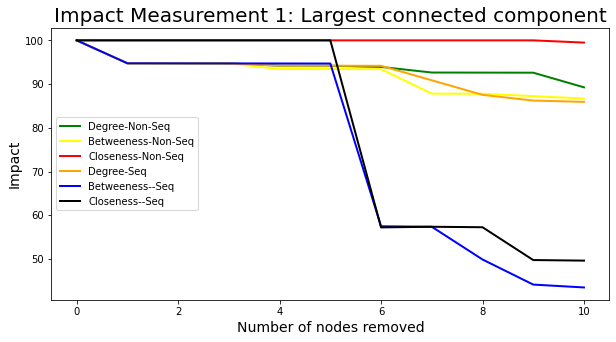

In [47]:
# plot the line chart:Non-sequential
plt.figure(figsize=(10,5))
plt.title('Impact Measurement 1: Largest connected component',fontsize=20)
plt.xlabel('Number of nodes removed',fontsize=14)
plt.ylabel('Impact',fontsize=14)
 
in1, = plt.plot(result_percent1,color="green",linewidth=2)
in2, = plt.plot(result_percent2,color="yellow",linewidth=2)
in3, = plt.plot(result_percent3,color="red",linewidth=2)
in4, = plt.plot(result_percent4,color="orange",linewidth=2)
in5, = plt.plot(result_percent5,color="blue",linewidth=2)
in6, = plt.plot(result_percent6,color="black",linewidth=2)
 
plt.legend(handles = [in1,in2,in3,in4,in5,in6],labels=['Degree-Non-Seq','Betweeness-Non-Seq','Closeness-Non-Seq','Degree-Seq','Betweeness--Seq','Closeness--Seq'],loc=6)
plt.show()

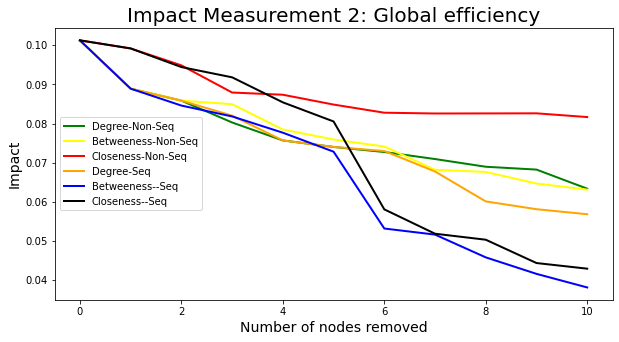

In [48]:
# plot the line chart:sequential
plt.figure(figsize=(10,5))
plt.title('Impact Measurement 2: Global efficiency',fontsize=20)
plt.xlabel('Number of nodes removed',fontsize=14)
plt.ylabel('Impact',fontsize=14)
 
in1, = plt.plot(result_global_eff1,color="green",linewidth=2)
in2, = plt.plot(result_global_eff2,color="yellow",linewidth=2)
in3, = plt.plot(result_global_eff3,color="red",linewidth=2)
in4, = plt.plot(result_global_eff4,color="orange",linewidth=2)
in5, = plt.plot(result_global_eff5,color="blue",linewidth=2)
in6, = plt.plot(result_global_eff6,color="black",linewidth=2)
 
plt.legend(handles = [in1,in2,in3,in4,in5,in6],labels=['Degree-Non-Seq','Betweeness-Non-Seq','Closeness-Non-Seq','Degree-Seq','Betweeness--Seq','Closeness--Seq'],loc=6)
plt.show()

## Flows: weighted network

In [49]:
# Inverse weights:
flows_inv={}

for e1, e2, flow in G.edges(data='flows'):
    if flow != 0:
        flows_inv.update({(e1, e2): round(1./flow,7)})
    else:
        flows_inv.update({(e1, e2): 0})

nx.set_edge_attributes(G,flows_inv,'flows_inv')

list(G.edges(data=True))[0:5]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'station_1_': 'Wembley Park',
   'station_2_': 'Kingsbury',
   'flows_inv': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'station_1_': 'Wembley Park',
   'station_2_': 'Neasden',
   'flows_inv': 0.0001483}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'station_1_': 'Wembley Park',
   'station_2_': 'Preston Road',
   'flows_inv': 2.73e-05}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'station_1_': 'Wembley Park',
   'station_2_': 'Finchley Road',
   'flows_inv': 1.81e-05}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'station_1_': 'Kingsbury',
   'station_2_': 'Queensbury',


In [50]:
#deg_london =nx.degree_centrality(G,weight='flows_inv')
#nx.set_node_attributes(G,dict(deg_london),'degree')

# To dataframe using the nodes as the index
#df_degree = pd.DataFrame(index=G.nodes())
#df_degree['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
#df_degree['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

#df_degree_sorted = df_degree.sort_values(["degree"], ascending=False)
#df_degree_sorted[0:10]

In [51]:
# Recompute according to betweenness centrality
bet_london_w=nx.betweenness_centrality(G,weight='flows_inv',normalized=False)

#### II.1. 10 most important nodes according to weighted betweenness centrality

In [52]:
between_w_df=pd.DataFrame.from_dict(dict(bet_london_w),columns=['bet_london_w'],orient='index')
node_w=list(between_w_df.sort_values('bet_london_w',axis = 0,ascending = False).index)
max_w=node_w[0:10]

max_w

['Green Park',
 'Bank and Monument',
 'Waterloo',
 'Westminster',
 'Liverpool Street',
 'Stratford',
 'Bond Street',
 'Euston',
 'Oxford Circus',
 'Warren Street']

In [53]:
between_w_df.sort_values('bet_london_w',ascending = False)

,bet_london_w
Green Park,44892.50
Bank and Monument,39758.50
Waterloo,31904.25
Westminster,29664.50
Liverpool Street,26530.00
...,...
Stepney Green,0.00
Bow Road,0.00
Bromley-by-Bow,0.00
High Barnet,0.00


In [54]:
#Weighted closeness centrality: 
#clos_w=nx.closeness_centrality(G, distance='flows_inv')
# We can add these values to the nodes attributes:
#nx.set_node_attributes(G,clos_w,'closeness_w')

# To dataframe using the nodes as the index
#df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
#df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

#df_sorted = df.sort_values(["closeness_w"], ascending=False)
#df_sorted[0:10]

#### II.3. Node removal

##### Average shortest path

###### a）without flows

In [55]:
G7a=G.copy()
# Number of existing nodes:
l7a=list(G7a.nodes)
len(l7a)

401

In [56]:
Gcc7a = sorted(nx.connected_components(G7a), key=len, reverse=True)
Gsub7a = G7a.subgraph(Gcc7a[0])
betweeness_w_path1=nx.average_shortest_path_length(Gsub7a)
print(betweeness_w_path1)

13.545997506234414


In [57]:
node1[0]

'Stratford'

In [58]:
G7a.remove_nodes_from([node1[0]])

Gcc7a = sorted(nx.connected_components(G7a), key=len, reverse=True)
Gsub7a = G7a.subgraph(Gcc7a[0])
betweeness_w_path2=nx.average_shortest_path_length(Gsub7a)
print(betweeness_w_path2)

14.496447069006436


In [59]:
changes_without_flows=(betweeness_w_path2-betweeness_w_path1)/betweeness_w_path1
print(changes_without_flows)

0.0701646048830724


###### b）with flows

In [60]:
G7b=G.copy()
# Number of existing nodes:
l7b=list(G7b.nodes)
len(l7b)

401

In [61]:
list(G7b.edges(data=True))[0:5]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'station_1_': 'Wembley Park',
   'station_2_': 'Kingsbury',
   'flows_inv': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'station_1_': 'Wembley Park',
   'station_2_': 'Neasden',
   'flows_inv': 0.0001483}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'station_1_': 'Wembley Park',
   'station_2_': 'Preston Road',
   'flows_inv': 2.73e-05}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'station_1_': 'Wembley Park',
   'station_2_': 'Finchley Road',
   'flows_inv': 1.81e-05}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'station_1_': 'Kingsbury',
   'station_2_': 'Queensbury',


In [62]:
Gcc7b = sorted(nx.connected_components(G7b), key=len, reverse=True)
Gsub7b = G7b.subgraph(Gcc7b[0])
betweeness_w_path3=nx.average_shortest_path_length(Gsub7b,weight ='flows_inv')
print(betweeness_w_path3)

#components = nx.connected_components(G7b)
# Use the max() command to find the largest one:
#largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
#Largest_subgraph = G7b.subgraph(largest_component)
#betweeness_w_path3 = nx.average_shortest_path_length(Largest_subgraph,weight='flows_inv')
#print(betweeness_w_path3)

0.0008114665523690714


In [63]:
[node_w[0]]

['Green Park']

In [64]:
G7b.remove_nodes_from([node_w[0]])

Gcc7b = sorted(nx.connected_components(G7b), key=len, reverse=True)
Gsub7b = G7b.subgraph(Gcc7b[0])
betweeness_w_path4=nx.average_shortest_path_length(Gsub7b,weight ='flows_inv')
print(betweeness_w_path4)

0.0008390851253132848


In [65]:
changes_with_flows=(betweeness_w_path4-betweeness_w_path3)/betweeness_w_path3
print(changes_with_flows)

0.034035380587876446


##### Largest connected component

###### a) without flows

In [66]:
G8a=G.copy()
# Number of existing nodes:
l8a=list(G8a.nodes)
len(l8a)

401

In [67]:
# number of connected components
no_of_component8a1=nx.number_connected_components(G8a)

# let's subset this graph to the largest connected component
Gcc8a1 = sorted(nx.connected_components(G8a), key=len, reverse=True)
Gsub8a1 = G8a.subgraph(Gcc8a1[0])
size8a1 = Gsub8a1.number_of_nodes()
    
# calculate the percentage of nodes present in the largest connected components
percent_lcc8a1 = (len(Gsub8a1.nodes)/len(G8a.nodes)) * 100

print(no_of_component8a1)    
print(size8a1)
print(percent_lcc8a1)

1
401
100.0


In [68]:
node1[0]

'Stratford'

In [69]:
G8a.remove_nodes_from([node1[0]])

# number of connected components
no_of_component8a2=nx.number_connected_components(G8a)

# let's subset this graph to the largest connected component
Gcc8a2 = sorted(nx.connected_components(G8a), key=len, reverse=True)
Gsub8a2 = G8a.subgraph(Gcc8a2[0])
size8a2 = Gsub8a2.number_of_nodes()
    
# calculate the percentage of nodes present in the largest connected components
percent_lcc8a2 = (len(Gsub8a2.nodes)/len(G8a.nodes)) * 100

print(no_of_component8a2)    
print(size8a2)
print(percent_lcc8a2)

3
379
94.75


In [70]:
changes_without_flows_lcc1=(no_of_component8a2-no_of_component8a1)/no_of_component8a1
changes_without_flows_lcc2=(size8a2-size8a1)/size8a1
changes_without_flows_lcc3=(percent_lcc8a2-percent_lcc8a1)/percent_lcc8a1
print(changes_without_flows_lcc1)
print(changes_without_flows_lcc2)
print(changes_without_flows_lcc3)

2.0
-0.05486284289276808
-0.0525


###### b) with flows

In [71]:
G8b=G.copy()
# Number of existing nodes:
l8b=list(G8b.nodes)
len(l8b)

401

In [72]:
G8b.remove_nodes_from([node_w[0]])

# number of connected components
no_of_component8b=nx.number_connected_components(G8b)

# let's subset this graph to the largest connected component
Gcc8b = sorted(nx.connected_components(G8b), key=len, reverse=True)
Gsub8b = G8b.subgraph(Gcc8b[0])
size8b = Gsub8b.number_of_nodes()
    
# calculate the percentage of nodes present in the largest connected components
percent_lcc8b = (len(Gsub8b.nodes)/len(G8b.nodes)) * 100

print(no_of_component8b)    
print(size8b)
print(percent_lcc8b)

1
400
100.0


In [73]:
changes_without_flows_lcc1=(no_of_component8b-no_of_component8a1)/no_of_component8a1
changes_without_flows_lcc2=(size8b-size8a1)/size8a1
changes_without_flows_lcc3=(percent_lcc8b-percent_lcc8a1)/percent_lcc8a1
print(changes_without_flows_lcc1)
print(changes_without_flows_lcc2)
print(changes_without_flows_lcc3)

0.0
-0.0024937655860349127
0.0
